# Abhishek Mehta

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
X_train=x_train.reshape(60000,784)
X_test=x_test.reshape(10000,784)

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(784,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.3397 - accuracy: 0.9040 - val_loss: 0.1992 - val_accuracy: 0.9414
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1565 - accuracy: 0.9538 - val_loss: 0.1389 - val_accuracy: 0.9569
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1143 - accuracy: 0.9655 - val_loss: 0.1175 - val_accuracy: 0.9631
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0920 - accuracy: 0.9723 - val_loss: 0.1091 - val_accuracy: 0.9674
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.0914 - val_accuracy: 0.9714
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0678 - accuracy: 0.9796 - val_loss: 0.0905 - val_accuracy: 0.9730
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0602 - accuracy: 0.9823 - val_loss: 0.0956 - val_accuracy: 0.9735
Epoch 

In [13]:
import numpy as np

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
img0 = np.array(X_train[0]).reshape(1,784)

In [17]:
model.predict(img0).argmax()

1/1 [==============================] - 0s 248ms/step


5

In [18]:
y_train[0].argmax()

5

In [19]:
def recognise(img):
  img=np.array(img).reshape(1,784)
  return model.predict(img).argmax()

In [20]:
y_pre=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [21]:
y_pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
len(y_pre)

10000

In [23]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
sum(y_pre==y_test.argmax(axis=1))

9733

In [25]:
9737/10000

0.9737

In [26]:
import matplotlib.pyplot as plt

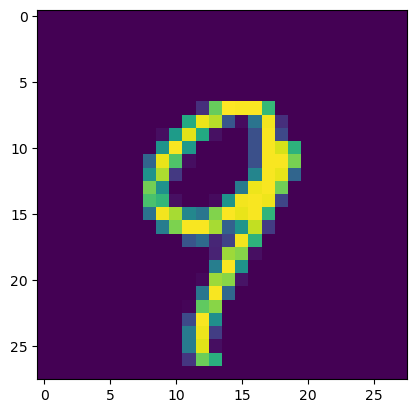

In [27]:
plt.imshow(np.array(X_test[560]).reshape(28,28))

In [28]:
recognise(X_test[560])

1/1 [==============================] - 0s 48ms/step


9